In [36]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import glob
import pandas as pd
import numpy as np
import math
from scipy.stats import ttest_rel, wilcoxon


ERROR! Session/line number was not unique in database. History logging moved to new session 130


In [37]:

class FalseDict(object):
    def __getitem__(self,key):
        return 0
    def __contains__(self, key):
        return True

In [38]:
def get_tensorboard_data(file_name, num_ids): 
    
    # container
    d = {
    'w_times':[],
    'step_nums':[],
    'vals':[]
    }
        
    # get tensorboard data
    event_acc = EventAccumulator(latest_file,
                                size_guidance=FalseDict())
    event_acc.Reload()
    w_times, step_nums, vals  = zip(*event_acc.Scalars('Perf/Reward'))

    d['w_times'] = w_times
    d['step_nums'] = step_nums
    d['vals'] = vals        
    
    return d

In [4]:
#move up in directory
os.chdir('../tensorboard')

In [39]:
os.getcwd()

'C:\\Users\\deniz\\Desktop\\PhD\\p1_generalization\\tensorboard'

In [43]:
# CONFIG
#'lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'
lstm_file_name = '{}_{}_nh_48_lr_0_0001_{}_ew_{}_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'


num_ids = 30

cell_type = ['lstm', 'rnn']
noise = ['n_u_p_0_5', 'n_n_p_0']
entropy = ['0','0_05','lin']
algorithm = ['rei','a2c']

low_episode = 49499
high_episode = 49999


In [ ]:
file_name = lstm_file_name



for c in cell_type:
    for n in noise:
        for e in entropy: 
            for a in algorithm:
                
                d1 = []
                d2 = []
                
                for id_ in range(num_ids):
                
                    if c == 'lstm' and n == 'n_u_p_0_5':
                        c = 'lstm2'
                    
                    if c == 'lstm2' and n == 'n_n_p_0':
                        c = 'lstm'
                    
                        
                    list_of_files = glob.glob(os.path.join(file_name.format(c, a, n, e, id_), '*')) # * means all if need specific format then *.csv
                    latest_file = max(list_of_files, key=os.path.getctime)
                                        
                    lstm_data = get_tensorboard_data(lstm_file_name, num_ids)
                    
                    lstm_df = pd.DataFrame(lstm_data)
                    #lstm_means = lstm_df.groupby('step_nums').mean().vals
                    
                    d1.extend(lstm_df.loc[lstm_df['step_nums']==low_episode].vals.to_numpy())
                    d2.extend(lstm_df.loc[lstm_df['step_nums']==high_episode].vals.to_numpy())

                # ttest dependant
                pval = ttest_rel(d1,d2).pvalue

                print('##############################')

                print('CELL: {};NOISE: {};ENTROPY: {}; ALG: {}, ID: {}'.format(c,n,e,a,id_))
                print('MEAN {}: {}, MEAN {}: {}, PVAL: {}'.format(low_episode + 1, np.mean(d1),
                                                                  high_episode + 1, np.mean(d2),
                                                                  pval))
                print('##############################')

                    
                    
                    
                
                
                
                

##############################
CELL: lstm2;NOISE: n_u_p_0_5;ENTROPY: 0; ALG: rei, ID: 29
MEAN 49500: 54.206827036539714, MEAN 50000: 53.81968002319336, PVAL: 0.35103844946987284
##############################
##############################
CELL: lstm2;NOISE: n_u_p_0_5;ENTROPY: 0; ALG: a2c, ID: 29
MEAN 49500: 53.89799525819976, MEAN 50000: 53.78026422961005, PVAL: 0.7769508522411683
##############################
##############################
CELL: lstm2;NOISE: n_u_p_0_5;ENTROPY: 0_05; ALG: rei, ID: 29
MEAN 49500: 54.701253509521486, MEAN 50000: 54.907131067911784, PVAL: 0.5813524041341016
##############################
##############################
CELL: lstm2;NOISE: n_u_p_0_5;ENTROPY: 0_05; ALG: a2c, ID: 29
MEAN 49500: 53.882306798299155, MEAN 50000: 54.09189008076986, PVAL: 0.6076940472219289
##############################
##############################
CELL: lstm2;NOISE: n_u_p_0_5;ENTROPY: lin; ALG: rei, ID: 29
MEAN 49500: 52.10231437683105, MEAN 50000: 51.48919359842936, PVAL: 0.

52.21175003051758

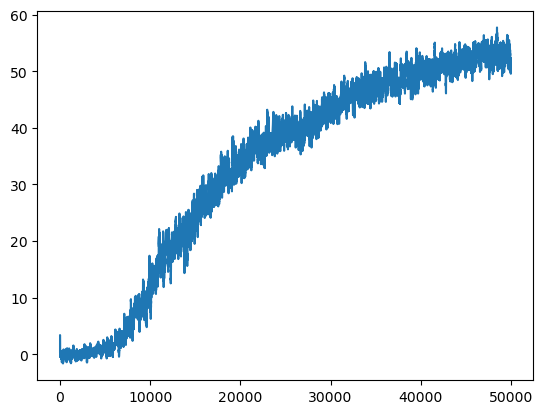

In [29]:
plt.plot(lstm_data['vals'])

In [10]:
lstm_data = get_tensorboard_data(lstm_file_name, num_ids)
lstm_df = pd.DataFrame(lstm_data)
lstm_means = lstm_df.groupby('step_nums').mean().vals

In [11]:
a = lstm_df.loc[lstm_df['step_nums']==low_episode].vals.to_numpy()
b = lstm_df.loc[lstm_df['step_nums']==high_episode].vals.to_numpy()

# ttest dependant
ttest_rel(a,b).pvalue

# means
print('mean reward {}: {}'.format(low_episode + 1, np.mean(a)))
print('mean reward {}: {}'.format(high_episode + 1, np.mean(b)))

mean reward 49000: 43.055484771728516
mean reward 50000: 45.443687438964844


C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
b

array([45.44368744])

In [13]:
# def smooth(scalars, weight):
#     """
#     EMA implementation according to
#     https://github.com/tensorflow/tensorboard/blob/34877f15153e1a2087316b9952c931807a122aa7/tensorboard/components/vz_line_chart2/line-chart.ts#L699
#     """
#     last = 0
#     smoothed = []
#     num_acc = 0
#     for next_val in scalars:
#         last = last * weight + (1 - weight) * next_val
#         num_acc += 1
#         # de-bias
#         debias_weight = 1
#         if weight != 1:
#             debias_weight = 1 - math.pow(weight, num_acc)
#         smoothed_val = last / debias_weight
#         smoothed.append(smoothed_val)

#     return smoothed

In [14]:
#rnn_data = get_tensorboard_data(rnn_file_name, num_ids)
lstm_data = get_tensorboard_data(lstm_file_name, num_ids)

In [15]:
#rnn_df = pd.DataFrame(rnn_data)
lstm_df = pd.DataFrame(lstm_data)

#rnn_means = rnn_df.groupby('step_nums').mean().vals
lstm_means = lstm_df.groupby('step_nums').mean().vals

In [16]:
# #plt.plot(rnn_df.groupby('step_nums').mean().vals)
# plt.plot(lstm_means)
# plt.xlabel("Number of Episodes")
# plt.ylabel("Average Reward")
# plt.legend(["RNN", "LSTM"], loc ="lower right")
# plt.savefig('../plots/training_loss_plot')

# Significance Testing

In [17]:
low_episode = 48999
high_episode = 49999

a = lstm_df.loc[lstm_df['step_nums']==low_episode].vals.to_numpy()
b = lstm_df.loc[lstm_df['step_nums']==high_episode].vals.to_numpy()

In [18]:
# ttest dependant
ttest_rel(a,b)

C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\deniz\AppData\Local\anaconda3\envs\rnn\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_relResult(statistic=nan, pvalue=nan)

In [19]:
# wilcoxon dependant
wilcoxon(a,b)

WilcoxonResult(statistic=0.0, pvalue=1.0)

In [20]:
# means
print('mean reward {}: {}'.format(low_episode + 1, np.mean(a)))
print('mean reward {}: {}'.format(high_episode + 1, np.mean(b)))

mean reward 49000: 43.055484771728516
mean reward 50000: 45.443687438964844


In [21]:
# ttest_pval = []
# wilc_pval = []

# for episode in range(2, 50000):
    
#     low_episode = episode - 1
#     high_episode = episode

#     a = lstm_df.loc[lstm_df['step_nums']==low_episode].vals.to_numpy()
#     b = lstm_df.loc[lstm_df['step_nums']==high_episode].vals.to_numpy()

#     # ttest dependant
#     ttest_pval.append(ttest_rel(a,b).pvalue)

#     # wilcoxon dependant
#     wilc_pval.append(wilcoxon(a,b).pvalue)

# Test convergence for LSTMs with different number of hidden units

In [22]:
lstm48_file_name = 'lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'
lstm64_file_name = 'lstm2_a2c_nh_64_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'
lstm80_file_name = 'lstm2_a2c_nh_80_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'
lstm96_file_name = 'lstm2_a2c_nh_96_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}'


In [23]:
lstm_data48 = get_tensorboard_data(lstm48_file_name, num_ids)
lstm_data64 = get_tensorboard_data(lstm64_file_name, num_ids)
lstm_data80 = get_tensorboard_data(lstm80_file_name, num_ids)
lstm_data96 = get_tensorboard_data(lstm96_file_name, num_ids)

In [24]:
lstm_data96 = get_tensorboard_data(lstm96_file_name, num_ids)

In [25]:
lstm48_df = pd.DataFrame(lstm_data48)
lstm64_df = pd.DataFrame(lstm_data64)
lstm80_df = pd.DataFrame(lstm_data80)
lstm96_df = pd.DataFrame(lstm_data96)



lstm48_means = lstm48_df.groupby('step_nums').mean().vals
lstm64_means = lstm64_df.groupby('step_nums').mean().vals
lstm80_means = lstm80_df.groupby('step_nums').mean().vals
lstm96_means = lstm96_df.groupby('step_nums').mean().vals

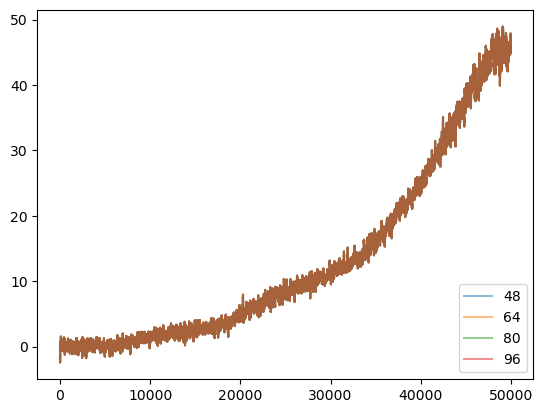

In [26]:
plt.plot(lstm48_means, alpha = 0.5)
plt.plot(lstm64_means, alpha = 0.5)
plt.plot(lstm80_means, alpha = 0.5)
plt.plot(lstm96_means, alpha = 0.5)

plt.legend(["48", "64", "80", "96"], loc ="lower right")
